In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
# Load the dataset
file_path = "C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv"
data = pd.read_csv(file_path)

In [47]:
# Drop rows with NaN values or fill them
data.dropna(inplace=True)  # Option to remove rows with NaN values

In [48]:
# Selecting only the meteorological features as predictors
X = data[['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']]
y = data['PM2.5 (ug/m3)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# FCNN

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

# Select features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the FCNN model
model_fcnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model_fcnn.compile(optimizer='adam', loss='mse')

# Training the model
model_fcnn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred_fcnn = model_fcnn.predict(X_test_scaled).flatten()

# Calculating evaluation metrics
rmse_fcnn = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
mae_fcnn = mean_absolute_error(y_test, y_pred_fcnn)
mse_fcnn = mean_squared_error(y_test, y_pred_fcnn)
mape_fcnn = np.mean(np.abs((y_test - y_pred_fcnn) / y_test)) * 100

# Printing evaluation metrics
print(f'FCNN Model Evaluation:')
print(f'RMSE: {rmse_fcnn}')
print(f'MAE: {mae_fcnn}')
print(f'MSE: {mse_fcnn}')
print(f'MAPE: {mape_fcnn}%')

Epoch 1/100
121/121 [==============================] - 1s 2ms/step - loss: 2138.9663
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 1059.5601
Epoch 3/100
121/121 [==============================] - 0s 1ms/step - loss: 985.3841
Epoch 4/100
121/121 [==============================] - 0s 1ms/step - loss: 951.3699
Epoch 5/100
121/121 [==============================] - 0s 1ms/step - loss: 930.9717
Epoch 6/100
121/121 [==============================] - 0s 1ms/step - loss: 912.3242
Epoch 7/100
121/121 [==============================] - 0s 1ms/step - loss: 896.2776
Epoch 8/100
121/121 [==============================] - 0s 1ms/step - loss: 890.4821
Epoch 9/100
121/121 [==============================] - 0s 1ms/step - loss: 878.2742
Epoch 10/100
121/121 [==============================] - 0s 1ms/step - loss: 876.2234
Epoch 11/100
121/121 [==============================] - 0s 1ms/step - loss: 863.2021
Epoch 12/100
121/121 [==============================] - 0s 1ms/step - lo

# LSTM

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd


features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building the LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model_lstm.compile(optimizer='adam', loss='mse')

# Training the model
model_lstm.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred_lstm = model_lstm.predict(X_test_scaled).flatten()

# Calculating evaluation metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100

# Printing evaluation metrics
print('LSTM Model Evaluation:')
print(f'RMSE: {rmse_lstm}')
print(f'MAE: {mae_lstm}')
print(f'MSE: {mse_lstm}')
print(f'MAPE: {mape_lstm}%')

Epoch 1/100
121/121 [==============================] - 2s 2ms/step - loss: 3961.6311
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 3733.2192
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 3186.9478
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 2479.9202
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 1892.2515
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 1531.9310
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 1343.8602
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 1239.9706
Epoch 9/100
121/121 [==============================] - 0s 2ms/step - loss: 1171.3633
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 1116.6675
Epoch 11/100
121/121 [==============================] - 0s 2ms/step - loss: 1069.8645
Epoch 12/100
121/121 [==============================] - 0s 2ms/

# FCNN + LSTM

# Adam Optimizer

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv"
data = pd.read_csv(file_path)

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building an enhanced LSTM model with more layers
model_enhanced_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),  # Adding dropout for regularization
    LSTM(50, activation='relu'),  # Second LSTM layer
    Dropout(0.2),  # Adding another dropout layer
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model_enhanced_lstm.compile(optimizer='adam', loss='mse')

# Training the model
model_enhanced_lstm.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred_enhanced_lstm = model_enhanced_lstm.predict(X_test_scaled).flatten()

# Calculating evaluation metrics
rmse_adam = np.sqrt(mean_squared_error(y_test, y_pred_enhanced_lstm))
mae_enhanced_lstm = mean_absolute_error(y_test, y_pred_enhanced_lstm)
mse_enhanced_lstm = mean_squared_error(y_test, y_pred_enhanced_lstm)
mape_enhanced_lstm = np.mean(np.abs((y_test - y_pred_enhanced_lstm) / y_test)) * 100

# Printing evaluation metrics
print('LSTM Model with adam optimizer Evaluation:')
print(f'RMSE: {rmse_adam}')
print(f'MAE: {mae_enhanced_lstm}')
print(f'MSE: {mse_enhanced_lstm}')
print(f'MAPE: {mape_enhanced_lstm}%')

Epoch 1/100
121/121 [==============================] - 4s 3ms/step - loss: 3287.8179
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 1366.5006
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 1087.7703
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 1012.4983
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 981.3995
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 964.2402
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 945.3341
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 941.4968
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 931.0547
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 918.1917
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 907.8579
Epoch 12/100
121/121 [==============================] - 0s 3ms/step - 

# Stochastic Gradient Descent Optimizer

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
data = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv")

# Identify columns with NaN values
nan_columns = data.columns[data.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

# Impute NaN values with mean
data.fillna(data.mean(), inplace=True)

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
rmse_sdg = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation
print('LSTM Model with SGD Optimizer Evaluation:')
print(f'RMSE: {rmse_sdg}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

Columns with NaN values: []


C:\Users\arock\AppData\Local\Temp\ipykernel_18496\54869009.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Epoch 1/100
121/121 [==============================] - 3s 3ms/step - loss: 1187.6261
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 1020.3065
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 1022.6431
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 1020.8204
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 1021.4694
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 1023.4495
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 1022.9854
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 1023.8013
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 1022.2188
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 1022.9214
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 1021.0569
Epoch 12/100
121/121 [==============================] - 0s 3ms/

# RMSprop optimizer

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump
from tensorflow.keras.models import load_model

# Load dataset
data = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv")

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(lr=0.001), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
rmse_rms = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation
print('LSTM Model with RMSprop Optimizer Evaluation:')
print(f'RMSE: {rmse_rms}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

# Save the entire model in the TensorFlow SavedModel format
model.save("lstm_air_quality_model")

# Save the StandardScaler instance to a file using joblib
dump(scaler, "scaler.joblib")

print("Model and scaler have been saved.")

Epoch 1/100
121/121 [==============================] - 4s 3ms/step - loss: 3382.4729
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 1606.1451
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 1189.5012
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 1047.8292
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 990.7223
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 968.0480
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 951.3076
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 933.0158
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 933.3871
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 927.4264
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 920.2308
Epoch 12/100
121/121 [==============================] - 0s 3ms/step - 

INFO:tensorflow:Assets written to: lstm_air_quality_model\assets


Model and scaler have been saved.


# AdaDelta optimizer

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adadelta
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
data = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv")

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model with Adadelta optimizer
model.compile(optimizer=Adadelta(lr=1.0), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
rmse_ad = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation
print('LSTM Model with AdaDelta Optimizer Evaluation:')
print(f'RMSE: {rmse_ad}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

Epoch 1/100
121/121 [==============================] - 4s 3ms/step - loss: 4009.1333
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.9866
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.8257
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.6477
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.4788
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.2817
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 4008.0789
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 4007.8718
Epoch 9/100
121/121 [==============================] - 0s 4ms/step - loss: 4007.6396
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 4007.3953
Epoch 11/100
121/121 [==============================] - 0s 4ms/step - loss: 4007.1328
Epoch 12/100
121/121 [==============================] - 0s 4ms/

# AdaGrad optimizer

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
data = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv")

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model with Adagrad optimizer
model.compile(optimizer=Adagrad(lr=0.01), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
rmse_ag = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation
print('LSTM Model with AdaGrad Optimizer Evaluation:')
print(f'RMSE: {rmse_ag}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

Epoch 1/100
121/121 [==============================] - 3s 3ms/step - loss: 3997.4912
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 3978.7908
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 3956.1638
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 3926.7129
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 3887.5347
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 3837.9216
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 3776.6919
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 3696.5322
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 3602.0813
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 3490.0964
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 3363.2866
Epoch 12/100
121/121 [==============================] - 0s 3ms/

# AdaMax optimizer

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
data = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv")

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
X = data[features].values
y = data['PM2.5 (ug/m3)'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model with Adamax optimizer
model.compile(optimizer=Adamax(lr=0.002), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
rmse_am = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation
print('LSTM Model with AdaGrad Optimizer Evaluation:')
print(f'RMSE: {rmse_am}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

Epoch 1/100
121/121 [==============================] - 5s 3ms/step - loss: 3943.8118
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 3414.7646
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 1883.0424
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 1290.6437
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 1220.9319
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 1167.1372
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 1132.2853
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 1107.3364
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 1071.4022
Epoch 10/100
121/121 [==============================] - 0s 3ms/step - loss: 1045.5194
Epoch 11/100
121/121 [==============================] - 0s 3ms/step - loss: 1055.9065
Epoch 12/100
121/121 [==============================] - 0s 3ms/

# RMSE plot

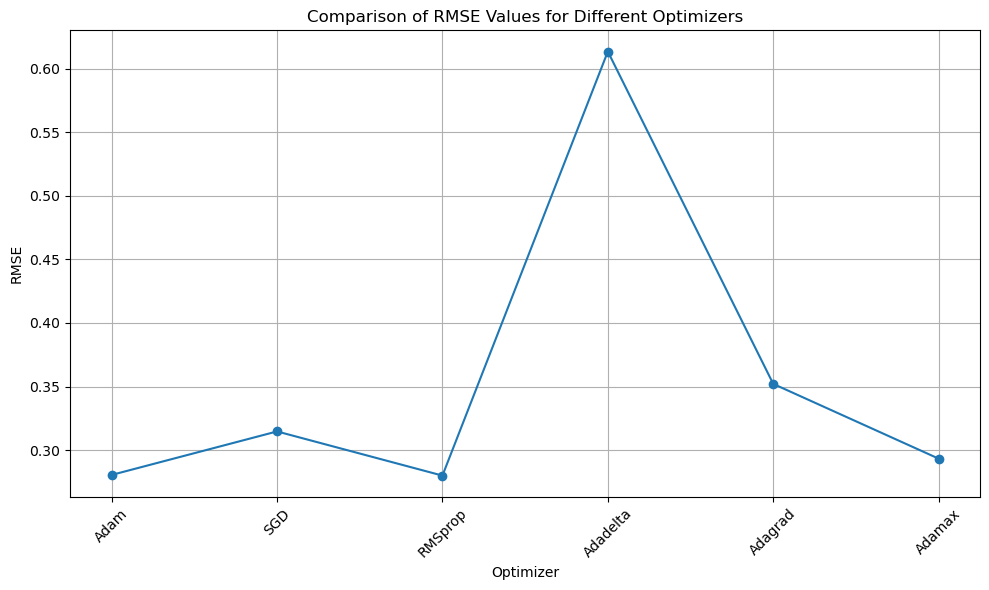

In [58]:
import matplotlib.pyplot as plt

# Scaling RMSE values
scaled_rmse_values = [rmse_adam / 100, rmse_sdg / 100, rmse_rms / 100, rmse_ad / 100, rmse_ag / 100, rmse_am / 100]  
optimizer_names = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax']  

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(optimizer_names, scaled_rmse_values, marker='o', linestyle='-')
plt.title('Comparison of RMSE Values for Different Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()